--- TWF ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2488
           1       0.00      0.00      0.00        12

    accuracy                           1.00      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.99      1.00      0.99      2500

--- HDF ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2478
           1       0.00      0.00      0.00        22

    accuracy                           0.99      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.98      0.99      0.99      2500

--- OSF ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2480
           1       1.00      0.60      0.75        20

    accuracy                           1.00      2500
   macro avg       1.00      0.80      0.87      2500
weighted avg       1.00      1.00     

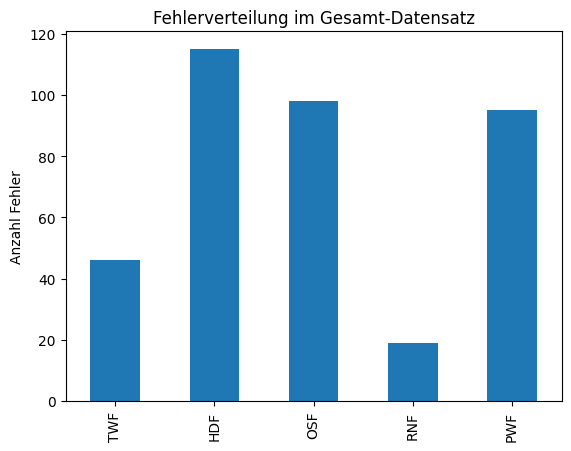

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Daten laden
df = pd.read_csv('../data/ai4i2020.csv')

# Zielvariablen: Fehlerarten
target_cols = ['TWF', 'HDF', 'OSF', 'RNF', 'PWF']
y = df[target_cols]

# Eingabe-Features inkl. Maschinentyp
features = ['Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]', 'Process temperature [K]', 'Type']
X = pd.get_dummies(df[features], drop_first=True)

# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modell: MultiOutputClassifier mit Random Forest
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)

# Vorhersage
y_pred = pd.DataFrame(multi_model.predict(X_test), columns=target_cols)

# Bewertung je Fehlerart
for col in target_cols:
    print(f"--- {col} ---")
    print(classification_report(y_test[col], y_pred[col], zero_division=0))

# Fehlerverteilung visualisieren
failures = y.sum()
failures.plot(kind='bar', title='Fehlerverteilung im Gesamt-Datensatz')
plt.ylabel('Anzahl Fehler')
plt.show()
